In [1]:
import gymnasium as gym
import numpy as np
import mediapy as media
import torch
# torch.multiprocessing.set_start_method('spawn')
import gym_lite6.env, gym_lite6.pickup_task
%env MUJOCO_GL=egl # Had to export this before starting jupyter server
# import mujoco

env: MUJOCO_GL=egl # Had to export this before starting jupyter server


""

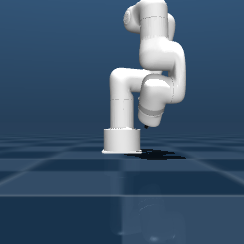

In [2]:
# from importlib import reload
# reload(gym_lite6.env)

task = gym_lite6.pickup_task.PickupTask('gripper_left_finger', 'gripper_right_finger', 'box', 'floor')
env = gym.make(
    "UfactoryCubePickup-v0",
    task=task,
    obs_type="pixels_state",
    max_episode_steps=300,
)
observation, info = env.reset()
media.show_image(env.render(), width=400, height=400)



In [9]:
import datasets
# datasets.config.IN_MEMORY_MAX_SIZE = 16*1024*1024
from datasets import load_from_disk
from pathlib import Path
# 
dataset_path = Path(__vsc_ipynb_file__).parent /"dataset/scripted_trajectories_50_2024-07-14_14-25-22.hf"
dataset = load_from_disk(str(dataset_path))


In [104]:
episode_idx = 40

episode_data = dataset.filter(lambda example: example['episode_index'] == episode_idx)

Filter:   0%|          | 0/15000 [00:00<?, ? examples/s]

In [105]:
frames = []
for data in episode_data:
    action = {"gripper": data["action.gripper"], "qpos": data["action.qpos"]}
    # print(action)
    observation, reward, terminated, truncated, info = env.step(action)
    # print(observation)
    frames.append(observation["pixels"])

media.show_video(frames)

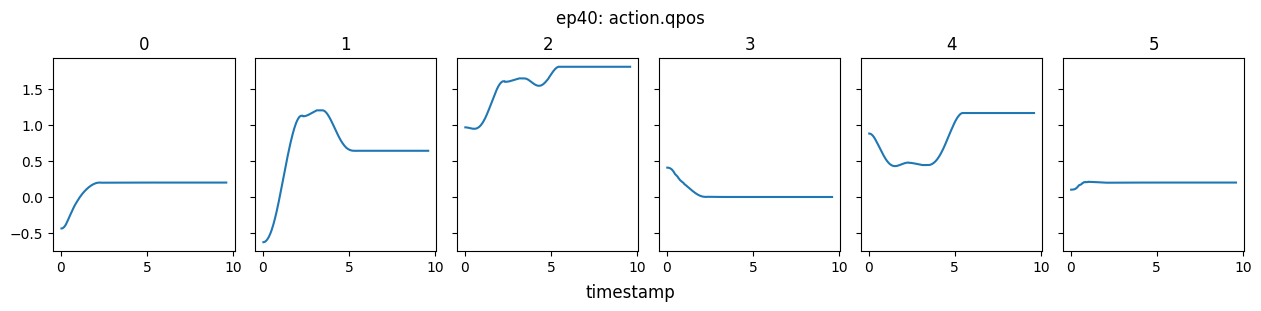

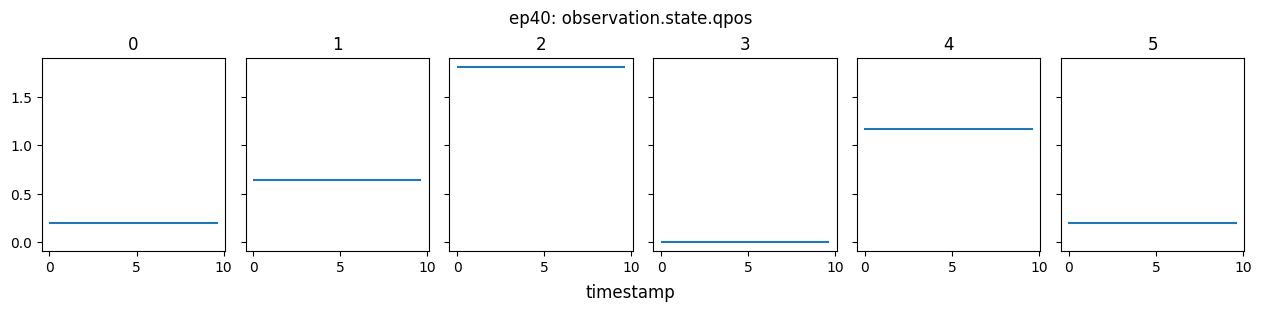

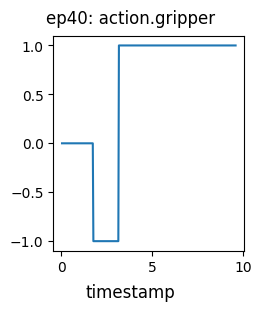

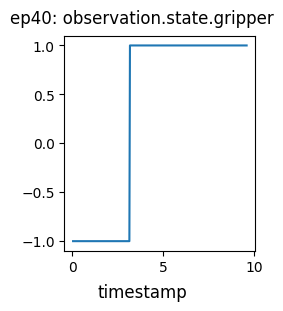

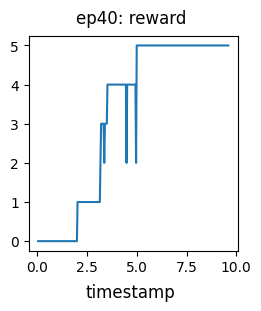

In [123]:
import matplotlib.pyplot as plt

vars = ['action.qpos', 'observation.state.qpos', 'action.gripper', 'observation.state.gripper', 'reward']
xax = 'timestamp'
for var in vars:
  if hasattr(episode_data[0][var], '__iter__'):
    len_state = len(episode_data[0][var])
  else:
    len_state = 1
  ncols = len_state; nrows= int(np.ceil(len_state/ncols))
  plt_data = torch.tensor(episode_data[var])
  fig, axs = plt.subplots(ncols=ncols, nrows=nrows, sharex=True, sharey=True, figsize=(ncols*2+0.5, nrows*2+1), constrained_layout=True)

  for i in range(len_state):
    # ax = plt.subplot(int(np.ceil(len_qpos/3)), 3, i+1)
    if len_state > 1:
      ax = axs.flatten()[i]
      ax.plot(episode_data[xax], plt_data[:, i])
      ax.set_title(i)
    else:
      ax = axs
      ax.plot(episode_data[xax], plt_data)

  # fig.add_subplot(111, frameon=False)
  plt.suptitle(f"ep{episode_idx}: {var}")
  # fig.supylabel("Joint angle")
  fig.supxlabel(xax)
  # plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
  # fig.tight_layout()


In [91]:
episode_data

Dataset({
    features: ['action.qpos', 'action.gripper', 'observation.state.qpos', 'observation.state.gripper', 'observation.pixels', 'reward', 'timestamp', 'frame_index', 'episode_index', 'index'],
    num_rows: 300
})

In [36]:
np.ceil(0.3)

AttributeError: 'numpy.float64' object has no attribute 'to'

In [125]:
env.unwrapped.data.qpos

array([ 2.00623691e-01,  6.44001646e-01,  1.80970371e+00,  2.85094406e-05,
        1.16738198e+00,  2.00728000e-01,  6.73270208e-04,  6.73108789e-04,
        2.81449724e-01, -3.75870166e-01,  4.99996502e-03,  6.07372585e-01,
       -2.45167540e-06, -3.27133563e-07,  7.94417109e-01])